In [7]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



def interpolation(x, y, variable):
    g =  InterpolatedUnivariateSpline(x, y, ext = 2, k= 1) # j_i = g(t_m)
    return g(variable)
              

# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.
    
def merger_nohalos(m_1, m_2, Δ_1, Δ_2, t_m):
    
    if  m_1 < m_min:  
        return 0
    
    elif m_2 < m_min:
        return 0
    
    else:
        
        X = np.geomspace(X_min, X_max, 1000000) 
        
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)
        
        
        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        
        

       # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉ .


        k = 22.3819
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))



        def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
            return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))



        def integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X):
            return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))


        return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand_nohalo(m_1,m_2,Δ_1,Δ_2, X),X)) 




In [8]:
m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)




m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

X_min = 1e-8
X_max = 1e5

f = np.geomspace(1e-5, 1, 11)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


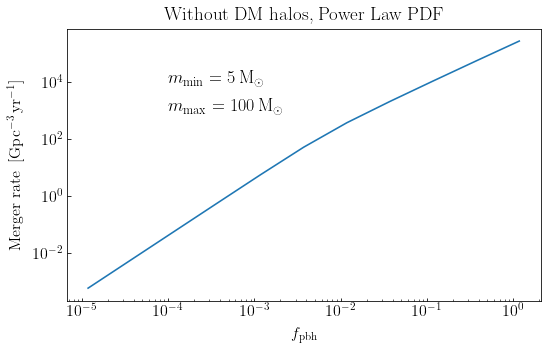

In [3]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_PWR1_nohalo = np.zeros((11, 11))
merge_PWR1_nohalo = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
            
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWR1_nohalo[i,j] = 0.5 * merger_nohalos(m_1, m_2, Δ_1, Δ_2, t_m)
            
            else:
                Merger_PWR1_nohalo[i,j] = merger_nohalos( m_1, m_2, Δ_1, Δ_2, t_m)   
            
            if m_1 < m_2:
                
                merge_PWR1_nohalo[z] +=  0
        
            else:
                merge_PWR1_nohalo[z] +=  Merger_PWR1_nohalo[i,j]
            

            
            
np.save("merge_PWR1_nohalo", merge_PWR1_nohalo)




plt.figure(figsize = (8.5, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e4, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWR1_nohalo)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title(' Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

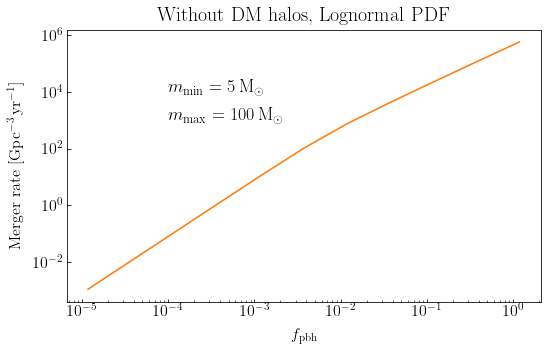

In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_Lognormal1_nohalo = np.zeros((11, 11))
merge_Lognormal1_nohalo = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_Lognormal1_nohalo[i,j] = 0.5 * merger_nohalos(m_1, m_2, Δ_1, Δ_2, t_m)
            
            else:
                Merger_Lognormal1_nohalo[i,j] = merger_nohalos( m_1, m_2, Δ_1, Δ_2, t_m)   
            
            
            if m_1 < m_2:
                
                merge_Lognormal1_nohalo[z] +=  0
        
            else:
                merge_Lognormal1_nohalo[z] +=  Merger_Lognormal1_nohalo[i,j]
            
            
        
np.save("merge_Lognormal1_nohalo", merge_Lognormal1_nohalo)
    

    
    
plt.figure(figsize = (8.5, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e4, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormal1_nohalo, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger  rate $[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

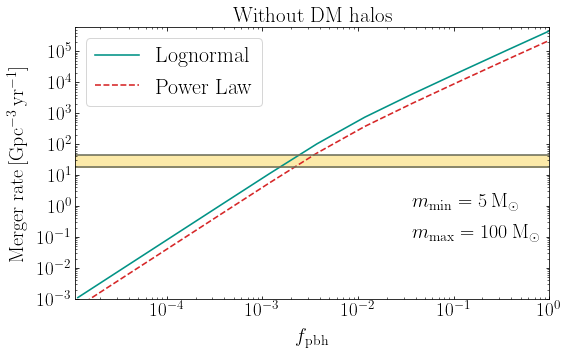

f_pbh_PWR_nohalo_17.9 = 1.86e-03
f_pbh_PWR_nohalo_44 = 3.31e-03

f_pbh_Lognormal_nohalo_17.9 = 1.37e-03
f_pbh_Lognormal_nohalo_44 = 2.10e-03


In [16]:
merge_PWR1_nohalo = np.load('merge_PWR1_nohalo.npy')
merge_Lognormal1_nohalo= np.load('merge_Lognormal1_nohalo.npy')



plt.figure(figsize = (8.5, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(3.7e-2, 1, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(3.7e-2, 0.1, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)

plt.loglog(f_pbh_list, merge_Lognormal1_nohalo, '#029386')
plt.loglog(f_pbh_list,  merge_PWR1_nohalo , 'C3', linestyle = '--')


plt.xlim(1.1e-5, 1)
plt.ylim(0.001, 6e5)


plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger  rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':22}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Without DM halos', fontsize = 21)
plt.savefig('1mergervsfnoDM.pdf', bbox_inches = 'tight')
plt.show()




f_pbh_PWR1_nohalo_lowerlimit        =  interpolation(merge_PWR1_nohalo, f_pbh_list, 17.9)
f_pbh_PWR1_nohalo_upperlimit        =  interpolation(merge_PWR1_nohalo, f_pbh_list, 44)
f_pbh_Lognormal1_nohalo_lowerlimit  =  interpolation(merge_Lognormal1_nohalo, f_pbh_list, 17.9)
f_pbh_Lognormal1_nohalo_upperlimit  =  interpolation(merge_Lognormal1_nohalo, f_pbh_list, 44)


print("f_pbh_PWR_nohalo_17.9 =", '%0.2e'%f_pbh_PWR1_nohalo_lowerlimit )
print("f_pbh_PWR_nohalo_44 =", '%0.2e'%f_pbh_PWR1_nohalo_upperlimit )
print('\v')
print("f_pbh_Lognormal_nohalo_17.9 =", '%0.2e'%f_pbh_Lognormal1_nohalo_lowerlimit)
print("f_pbh_Lognormal_nohalo_44 =", '%0.2e'%f_pbh_Lognormal1_nohalo_upperlimit)

In [2]:
bin_centres = np.geomspace(2e-3, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-3, 96, 11)
m_2 = np.geomspace(2e-3, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 
    


# To save some time I wrote them by hand.
m_1_list = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96] 
m_2_list = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96]


Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5

f = np.geomspace(1e-5, 1, 11)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_1 = [0.002, 0.01, 0.02, 0.05, 0.2, 0.4, 1, 4, 11, 33, 96] M☉

Δ_1 = [0.00226168, 0.00664593, 0.01952898, 0.05738571, 0.16862729, 0.49550949, 1.45604937, 4.27858558, 12.57257825, 36.94438751, 108.56068991]


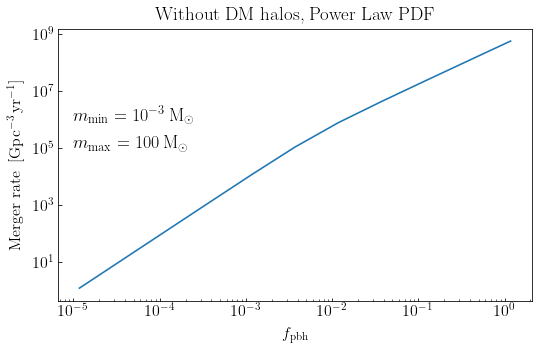

In [19]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_PWR2_nohalo = np.zeros((11, 11))
merge_PWR2_nohalo = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-3     #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_PWR2_nohalo[i,j] = 0.5 * merger_nohalos(m_1, m_2, Δ_1, Δ_2, t_m)
            
            else:
                Merger_PWR2_nohalo[i,j] = merger_nohalos( m_1, m_2, Δ_1, Δ_2, t_m)   
            
            if m_1 < m_2:
                
                merge_PWR2_nohalo[z] +=  0
        
            else:
                merge_PWR2_nohalo[z] +=  Merger_PWR2_nohalo[i,j]
            

            
            
np.save("merge_PWR2_nohalo", merge_PWR2_nohalo)




plt.figure(figsize = (8.5, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-5, 1e6, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-5, 1e5, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_PWR2_nohalo)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

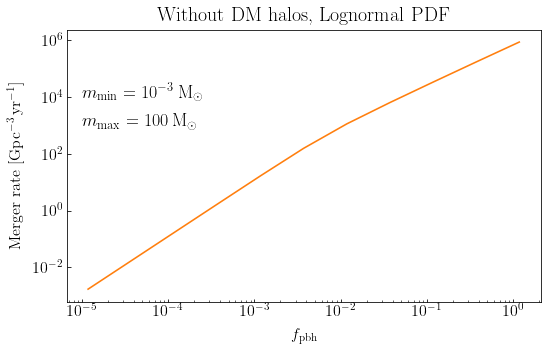

In [20]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.



Merger_Lognormal2_nohalo = np.zeros((11, 11))
merge_Lognormal2_nohalo = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    for i, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
        for j, (m_2, Δ_2)  in enumerate(zip(m_2_list, Δ_2_list)):
         
          
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_Lognormal2_nohalo[i,j] = 0.5 * merger_nohalos(m_1, m_2, Δ_1, Δ_2, t_m)
            
            else:
                Merger_Lognormal2_nohalo[i,j] = merger_nohalos( m_1, m_2, Δ_1, Δ_2, t_m)   
            
            
            if m_1 < m_2:
                
                merge_Lognormal2_nohalo[z] +=  0
        
            else:
                merge_Lognormal2_nohalo[z] +=  Merger_Lognormal2_nohalo[i,j]
            
            
        
np.save("merge_Lognormal2_nohalo", merge_Lognormal2_nohalo)
    

    
    
plt.figure(figsize = (8.5, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-5, 1e4, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-5, 1e3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_Lognormal2_nohalo, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger  rate $[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

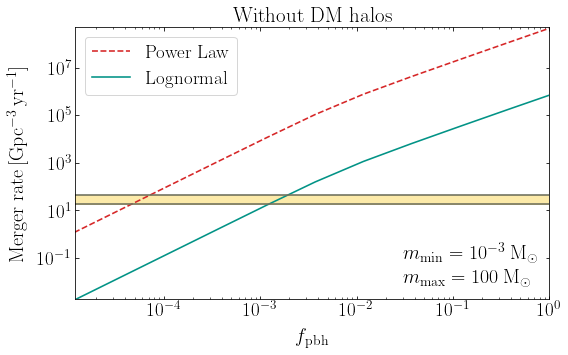

f_pbh_PWR_nohalo_17.9 = 4.19e-05
f_pbh_PWR_nohalo_44 = 6.17e-05

f_pbh_Lognormal_nohalo_17.9 = 1.20e-03
f_pbh_Lognormal_nohalo_44 = 1.67e-03


In [6]:
merge_PWR2_nohalo = np.load('merge_PWR2_nohalo.npy')
merge_Lognormal2_nohalo = np.load('merge_Lognormal2_nohalo.npy')



plt.figure(figsize = (8.5, 5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(3e-2, 0.1, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(3e-2, 1e-2, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


plt.loglog(f_pbh_list,  merge_PWR2_nohalo , 'C3', linestyle = '--')
plt.loglog(f_pbh_list, merge_Lognormal2_nohalo, '#029386')

plt.xlim(1.2e-5, 1)
plt.ylim(1.9e-3, 5e8)


plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger  rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([  "Power Law", "Lognormal"], prop = {'size':19}, loc = 'upper left', 
           facecolor = 'white', fontsize = 110)
plt.title('Without DM halos', fontsize = 21)
plt.savefig('2mergervsfnoDM.pdf', bbox_inches = 'tight')
plt.show()




f_pbh_PWR2_nohalo_lowerlimit        =  interpolation(merge_PWR2_nohalo, f_pbh_list, 17.9)
f_pbh_PWR2_nohalo_upperlimit        =  interpolation(merge_PWR2_nohalo, f_pbh_list, 44)

f_pbh_Lognormal2_nohalo_lowerlimit  =  interpolation(merge_Lognormal2_nohalo, f_pbh_list, 17.9)
f_pbh_Lognormal2_nohalo_upperlimit  =  interpolation(merge_Lognormal2_nohalo, f_pbh_list, 44)


print("f_pbh_PWR_nohalo_17.9 =", '%0.2e'%f_pbh_PWR2_nohalo_lowerlimit )
print("f_pbh_PWR_nohalo_44 =", '%0.2e'%f_pbh_PWR2_nohalo_upperlimit )
print('\v')
print("f_pbh_Lognormal_nohalo_17.9 =", '%0.2e'%f_pbh_Lognormal2_nohalo_lowerlimit)
print("f_pbh_Lognormal_nohalo_44 =", '%0.2e'%f_pbh_Lognormal2_nohalo_upperlimit) 

In [ ]:
# So,for the merger rate R_12 of masses m_1 and m_2 
# in range 5 M☉ - 100 M☉ with values 17.9 - 44 Gpc⁻3 yr⁻1, 
# following are the values of f_pbh:-


# A.) For PBH binaries without DM halos in mass range of m_1 = m_2 = (5 - 100) M☉:-
       # a.) Power law PDF -   1.86e-3 ≤ f_pbh ≤ 3.31e-3
       # b.) Lognormal PDF -   1.37e-3 ≤ f_pbh ≤ 2.10e-3

        
        
# B.) For PBH binaries without DM halos in mass range of m_1 = m_2 = (1e-3 - 100) M☉:-
        # c.) Power law PDF -   4.19e-5 ≤ f_pbh ≤ 6.17e-5
        # d.) Lognormal PDF -   1.20e-3 ≤ f_pbh ≤ 1.67e-3     